In [1]:
%cd ..
from src.utils import *
from src.algos import *

e:\coding\essa-tsp-metaheuristics


## Data Loading

In [2]:
distances = load_data('data\Dane_TSP_127.xlsx')

## Settings - one sample

In [3]:
INIT_POP_SIZE = 250
POP_SIZE = 500
NO_GENERATIONS = 5
SELECTION_METHOD = "roulette"
CROSSOVER_RATE = .9
ELITE_SIZE = None
TOURNAMENT_SIZE = 4
MUTATION_RATE = .15
NEIGH_TYPE = "simple"
RANDOM_STATE = None
VERBOSE = True

In [4]:
ga = GeneticAlgorithm(
    init_pop_size=INIT_POP_SIZE,
    pop_size=POP_SIZE,
    no_generations=NO_GENERATIONS,
    selection_method=SELECTION_METHOD,
    crossover_rate=CROSSOVER_RATE,
    elite_size=ELITE_SIZE,
    tournament_size=TOURNAMENT_SIZE,
    mutation_rate=MUTATION_RATE,
    neigh_type=NEIGH_TYPE,
    random_state=RANDOM_STATE,
    verbose=VERBOSE,
)
result = ga.solve(distances)
result

Initial population: Individual(path: 46...69, distance: 574438.62)
Generation 0: Individual(path: 46...69, distance: 568090.69)
Generation 1: Individual(path: 46...69, distance: 568090.69)
Generation 2: Individual(path: 125...69, distance: 565029.43)
Generation 3: Individual(path: 6...107, distance: 558677.72)
Generation 4: Individual(path: 64...37, distance: 558597.59)
Final population: Individual(path: 64...37, distance: 558597.59)


best distance: 558597.5943389491
algorithm: GENETIC ALGORITHM
solving time: 8.571 s
history: [inf, 568090.6942390491, 568090.6942390491, 565029.4311495327, 558677.7202638506, 558597.5943389491]

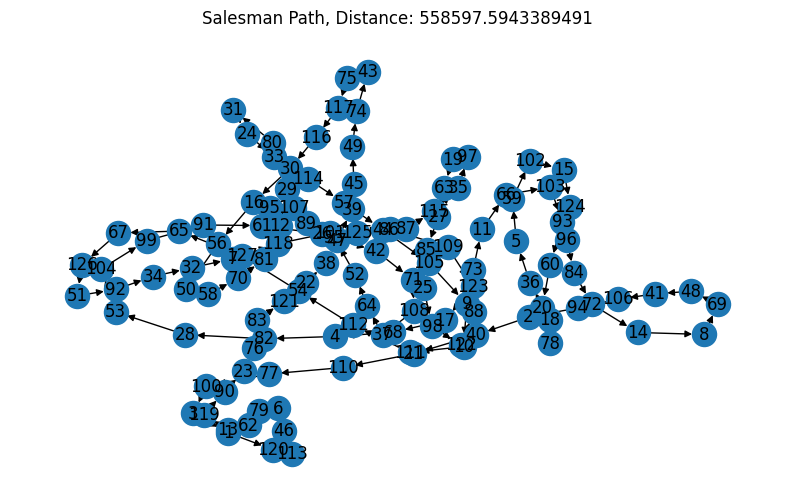

In [5]:
# Example of plotting the path
pp = PathPlotter()
pp.plot(result)

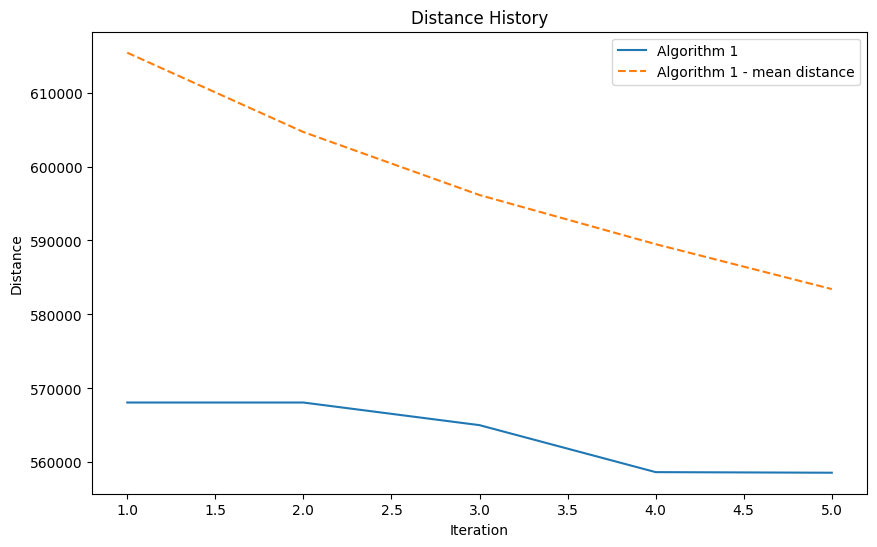

In [6]:
dhp = DistanceHistoryPlotter()
dhp.plot([result])

# Comparing multiple parameters

### STEP I - make a list from the compared parameter

In [7]:
INIT_POP_SIZE = 100
POP_SIZE = 200
NO_GENERATIONS = 600 
SELECTION_METHOD = ["tournament", "elitism", "roulette"] # in this case, we will compare 3 different values of SELECTION_METHOD
CROSSOVER_RATE = .9
ELITE_SIZE = None
TOURNAMENT_SIZE = 5
MUTATION_RATE = .15
NEIGH_TYPE = "simple"
RANDOM_STATE = None
VERBOSE = True

### STEP II - run models

In [8]:
results = []
for benchmarking_parameter in SELECTION_METHOD: #replace SELECTION_METHOD with any other parameter you want to compare
    ga = GeneticAlgorithm(
        init_pop_size=INIT_POP_SIZE,
        pop_size=POP_SIZE,
        no_generations=NO_GENERATIONS,
        selection_method=benchmarking_parameter,  # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter
        crossover_rate=CROSSOVER_RATE,
        elite_size=ELITE_SIZE,
        tournament_size=TOURNAMENT_SIZE,
        mutation_rate=MUTATION_RATE,
        neigh_type=NEIGH_TYPE,
        random_state=RANDOM_STATE,
        verbose=VERBOSE,
    )
    some_result = ga.solve(distances)
    results.append(some_result) # Results are stored in a list

Initial population: Individual(path: 28...34, distance: 578545.57)
Generation 0: Individual(path: 126...80, distance: 575069.91)
Generation 1: Individual(path: 126...69, distance: 566982.15)
Generation 2: Individual(path: 113...34, distance: 548172.22)
Generation 3: Individual(path: 83...71, distance: 530940.47)
Generation 4: Individual(path: 69...37, distance: 521773.11)
Generation 5: Individual(path: 7...71, distance: 502842.91)
Generation 6: Individual(path: 57...71, distance: 500048.33)
Generation 7: Individual(path: 86...6, distance: 496153.60)
Generation 8: Individual(path: 52...71, distance: 491262.16)
Generation 9: Individual(path: 73...6, distance: 484268.37)
Generation 10: Individual(path: 85...71, distance: 477773.00)
Generation 11: Individual(path: 88...71, distance: 471215.69)
Generation 12: Individual(path: 83...72, distance: 467202.45)
Generation 13: Individual(path: 26...71, distance: 460990.47)
Generation 14: Individual(path: 125...71, distance: 459462.12)
Generation 1

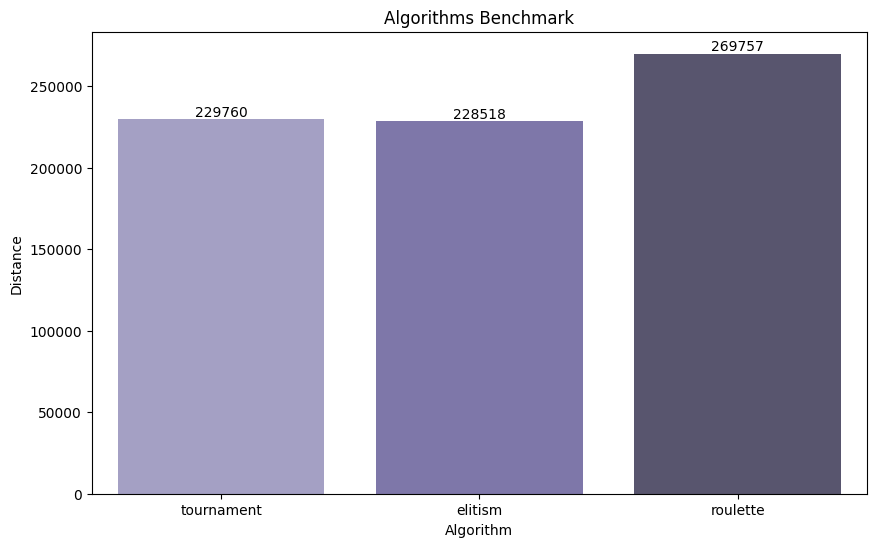

In [9]:
bp = BenchmarkPlotter()
bp.plot(results, labels=SELECTION_METHOD, palette="Purples_d") # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter

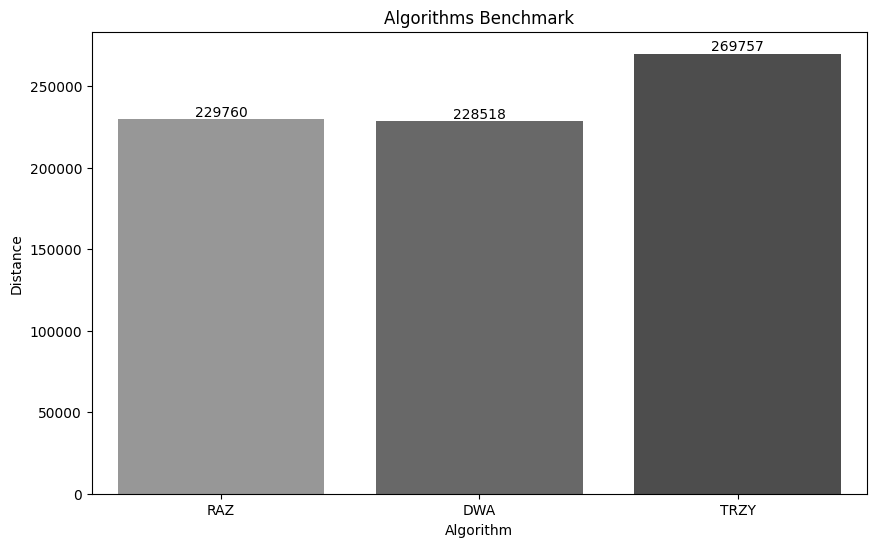

In [10]:
bp.plot(
        results, labels=["RAZ", "DWA", "TRZY"], palette="Greys_d"
    )  # Reds_d, Blues_d, Greens_d, Purples_d, Oranges_d, Greys_d

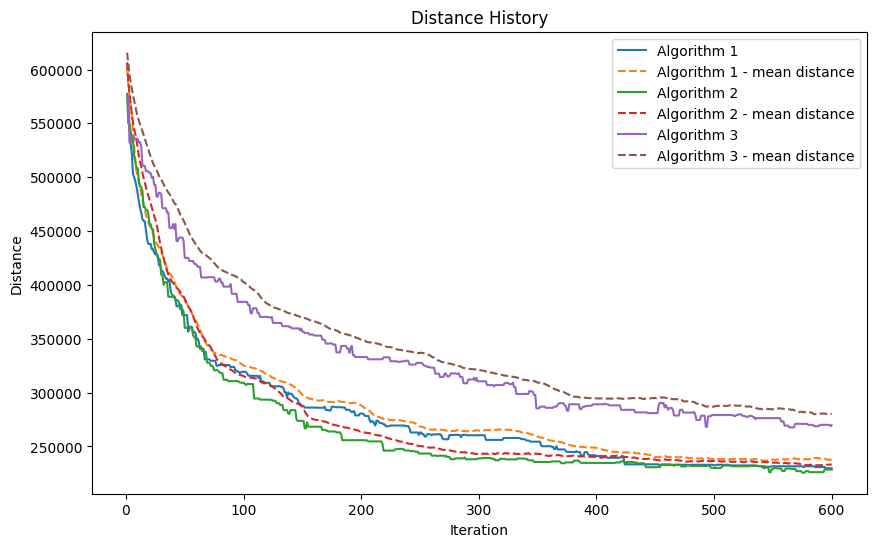

In [11]:
dhp = DistanceHistoryPlotter()
dhp.plot(results)

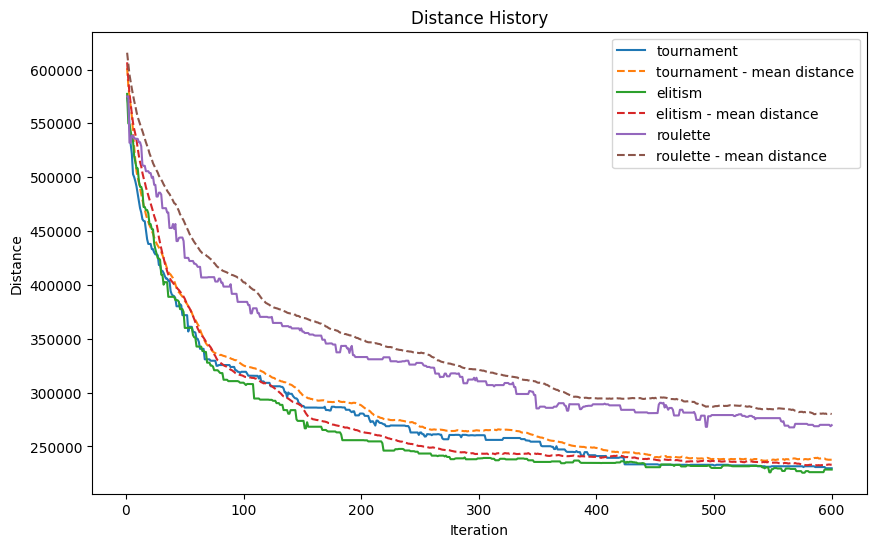

In [12]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)

# Parallel approach

In [13]:
from joblib import Parallel, delayed

In [14]:
def solver(distances, **kwargs):
    """Solver function for parallel processing"""
    return GeneticAlgorithm(**kwargs).solve(distances)

In [16]:
parallel_results = Parallel(n_jobs=-1, verbose=1)(delayed(solver)(
    distances,
    init_pop_size=INIT_POP_SIZE,
    pop_size=POP_SIZE,
    no_generations=NO_GENERATIONS,
    selection_method=benchmarking_parameter,  # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter
    crossover_rate=CROSSOVER_RATE,
    elite_size=ELITE_SIZE,
    tournament_size=TOURNAMENT_SIZE,
    mutation_rate=MUTATION_RATE,
    neigh_type=NEIGH_TYPE,
    random_state=RANDOM_STATE,
    verbose=VERBOSE,) for benchmarking_parameter in SELECTION_METHOD)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min finished


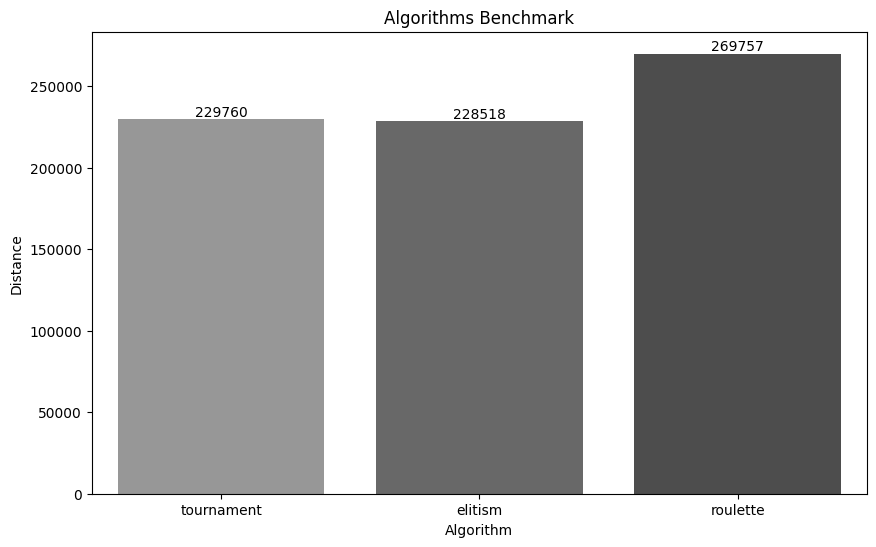

In [17]:
bp.plot(
        results, labels=SELECTION_METHOD, palette="Greys_d"
    )  # Reds_d, Blues_d, Greens_d, Purples_d, Oranges_d, Greys_d

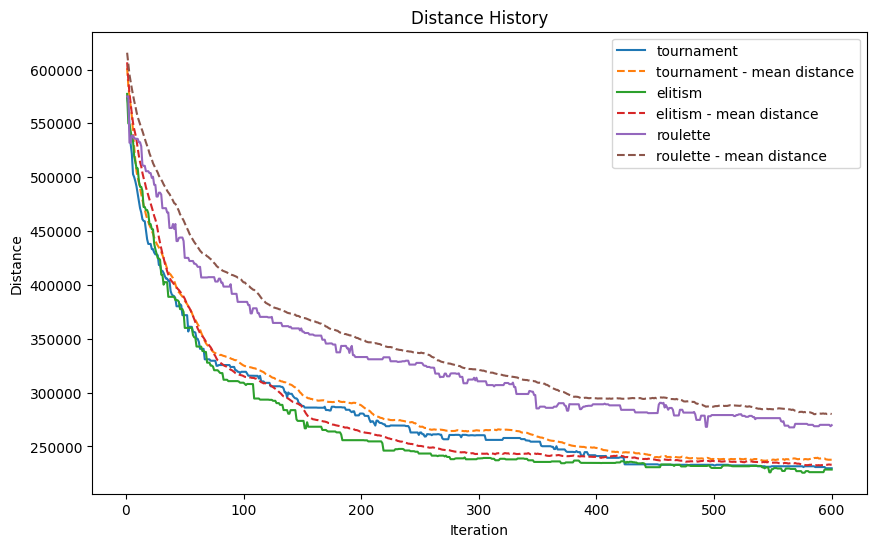

In [18]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)